#Mount Drive, load Dataset and Libraries

Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Extract dataset

In [ ]:
!unzip "/content/drive/MyDrive/Datasets/rice_dataset.zip"

Streaming output truncated to the last 5000 lines.
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (55).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (550).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5500).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5501).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5502).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5503).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5504).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5505).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5506).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5507).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5508).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5509).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (551).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5510).jpg  
  inflating: Rice_Image_Dataset/Karacadag/K

Install split-folder for splitting dataset

In [ ]:
!pip install split-folders

Import libraries

In [ ]:
import splitfolders
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout , BatchNormalization
from sklearn.metrics import confusion_matrix, classification_report

# remove warnings
import warnings
warnings.filterwarnings('ignore')

#Dataset

In [ ]:
Data ="/content/Rice_Image_Dataset"

In [ ]:
# splite dataset to 3 class of train, validation and test
splitfolders.ratio(Data, output='Rice_Image_Train_Validation_Test', seed=42, ratio=(.7, .2, .1), group_prefix=None)

Copying files: 75000 files [00:25, 2924.90 files/s]


In [ ]:
# read train, validation and test in dataset
BATCH_SIZE = 20

IMAGE_SIZE = (160, 160)

Train = keras.utils.image_dataset_from_directory(
    directory = '/content/Rice_Image_Train_Validation_Test/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = BATCH_SIZE,
    image_size = IMAGE_SIZE,
    seed = 42,
)

Validation = keras.utils.image_dataset_from_directory(
    directory = '/content/Rice_Image_Train_Validation_Test/val',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = BATCH_SIZE,
    image_size = IMAGE_SIZE,
    seed = 42,
)

Test = keras.utils.image_dataset_from_directory(
    directory = '/content/Rice_Image_Train_Validation_Test/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = BATCH_SIZE,
    image_size = IMAGE_SIZE,
    seed = 42,
)

Found 52500 files belonging to 5 classes.
Found 15000 files belonging to 5 classes.
Found 7500 files belonging to 5 classes.


In [ ]:
# check each train, vallidation, test classess
for i in [Train, Validation, Test]:
    class_names = i.class_names
    print(class_names)

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


In [ ]:
# check type of each class
print(f"The Train has {len(Train.class_names)} classes called: {Train.class_names}")
print(f"The Validation has {len(Validation.class_names)} classes called: {Validation.class_names}")
print(f"The Test has {len(Test.class_names)} classes called: {Test.class_names}")

The Train has 5 classes called: ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
The Validation has 5 classes called: ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
The Test has 5 classes called: ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


In [ ]:
# check shapes
for image_batch, labels_batch in Train:
    print(f"Train Shape: {image_batch.shape} (Bathes = {len(Train)})")
    print(f"Train label: {labels_batch.shape}\n")
    break
for image_batch, labels_batch in Validation:
    print(f"Validation Shape: {image_batch.shape} (Bathes = {len(Validation)})")
    print(f"Validation label: {labels_batch.shape}\n")
    break
for image_batch, labels_batch in Test:
    print(f"Test Shape: {image_batch.shape} (Bathes = {len(Test)})")
    print(f"Test label: {labels_batch.shape}\n")
    break

Train Shape: (20, 160, 160, 3) (Bathes = 2625)
Train label: (20,)

Validation Shape: (20, 160, 160, 3) (Bathes = 750)
Validation label: (20,)

Test Shape: (20, 160, 160, 3) (Bathes = 375)
Test label: (20,)



#### Show sample data

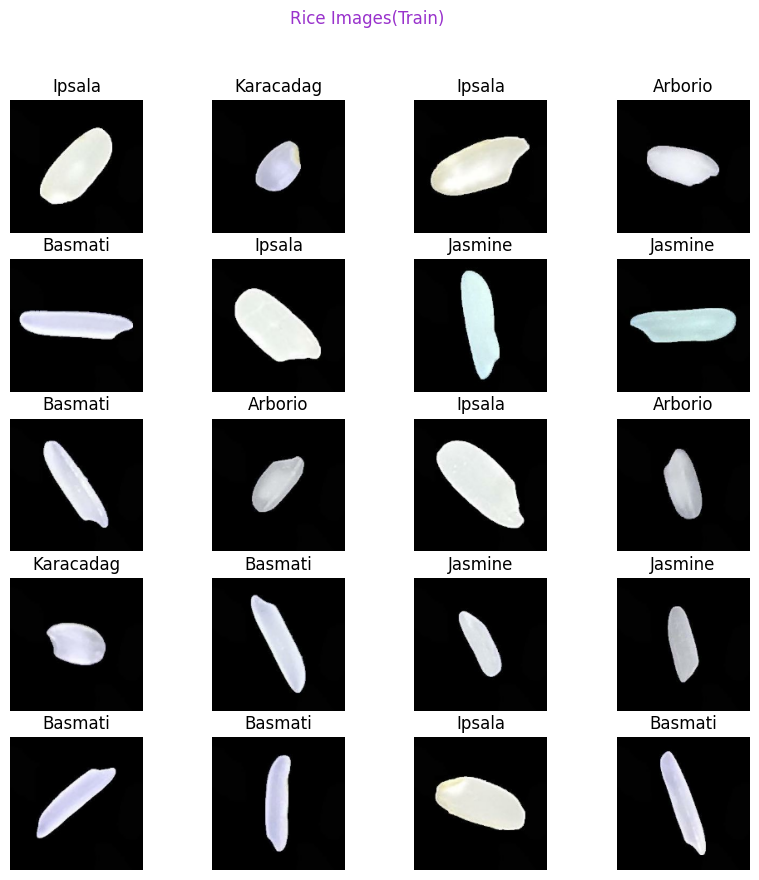

In [ ]:
# visualize the Train to verify is in the correct format
plt.figure(figsize=(10, 10))
for images, labels in Train.take(1):
  for i in range(20):
    ax = plt.subplot(5, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint32"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
    plt.suptitle('Rice Images(Train)', y=0.97, color='darkorchid')
plt.show()

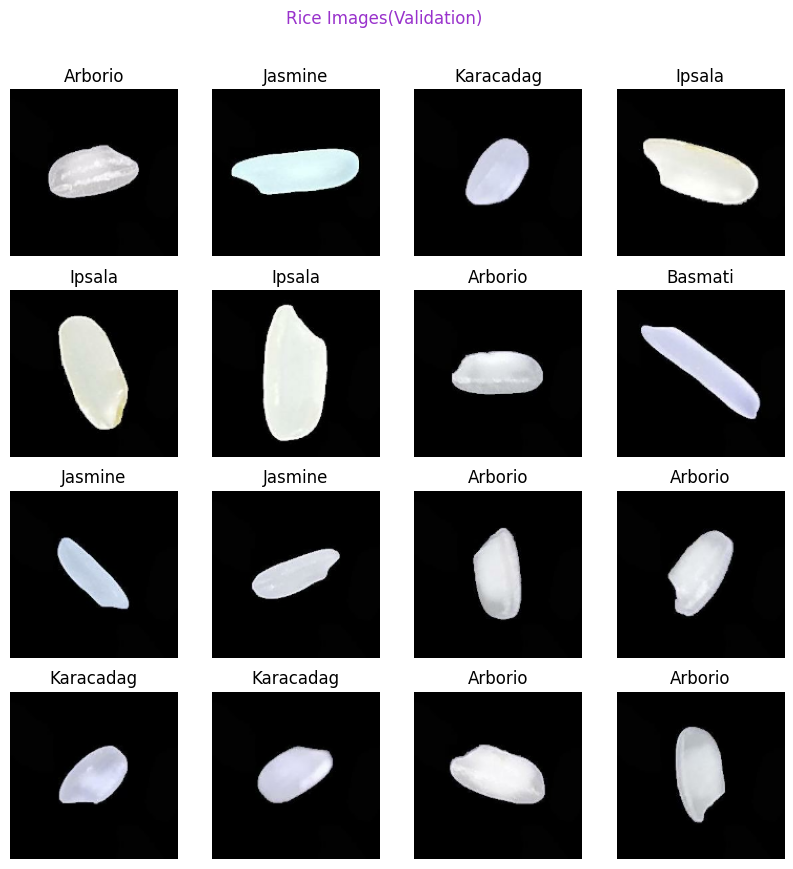

In [ ]:
# visualize the Validation to verify is in the correct format
plt.figure(figsize=(10, 10))
for images, labels in Validation.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint16"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
    plt.suptitle('Rice Images(Validation)', y=0.96, color='darkorchid')
plt.show()

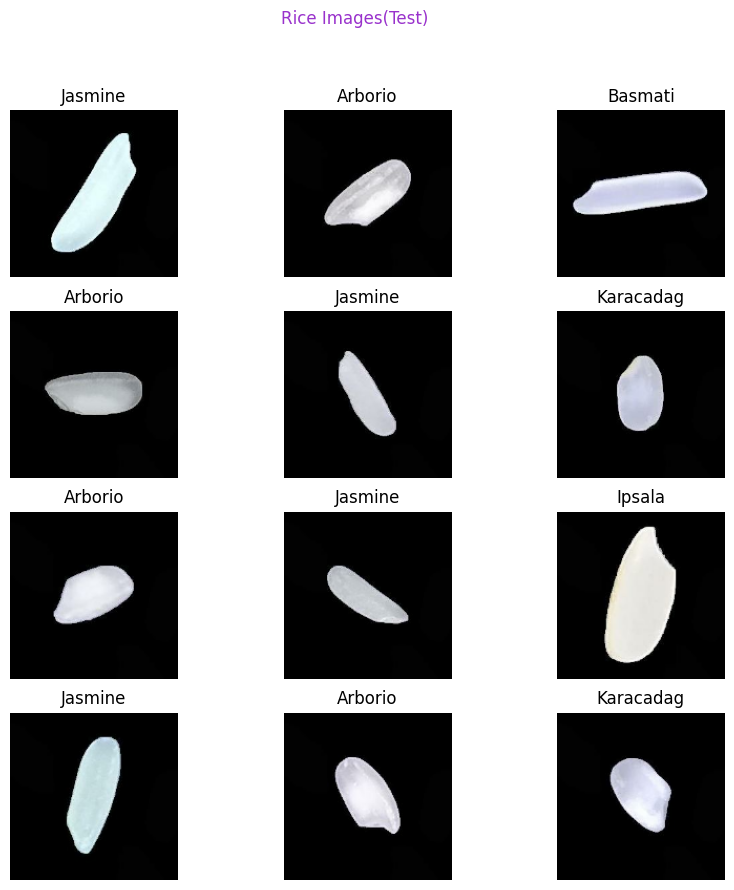

In [ ]:
# visualize the Test to verify is in the correct format
plt.figure(figsize=(10, 10))
for images, labels in Test.take(1):
  for i in range(12):
    ax = plt.subplot(4, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
    plt.suptitle('Rice Images(Test)', y=0.98, color='darkorchid')
plt.show()

#Create Model and Train

###CNN

In [ ]:
# Create CNN Model
CNN_Model = tf.keras.models.Sequential()
CNN_Model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3,activation='relu', input_shape=(160,160,3)))
CNN_Model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3,activation='relu', input_shape=(160,160,3)))
CNN_Model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))
CNN_Model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))
CNN_Model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))
CNN_Model.add(tf.keras.layers.Flatten())
CNN_Model.add(tf.keras.layers.Dense(units=320, activation='relu'))
CNN_Model.add(tf.keras.layers.Dense(units=5, activation='sigmoid'))

In [ ]:
CNN_Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 158, 158, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 156, 156, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 78, 78, 32)       0         
 )                                                               
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 39, 39, 32)       0         
 2D)                                                             
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 32)       0         
 2D)                                                             
                                                        

In [ ]:
CNN_Model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
History_CNN = CNN_Model.fit(x=Train, validation_data= Validation, epochs=10)

Epoch 1/10
2625/2625 [==============================] - 104s 35ms/step - loss: 0.4249 - accuracy: 0.9604 - val_loss: 0.0675 - val_accuracy: 0.9769
Epoch 2/10
2625/2625 [==============================] - 81s 31ms/step - loss: 0.0560 - accuracy: 0.9818 - val_loss: 0.0567 - val_accuracy: 0.9829
Epoch 3/10
2625/2625 [==============================] - 81s 31ms/step - loss: 0.0419 - accuracy: 0.9854 - val_loss: 0.0542 - val_accuracy: 0.9841
Epoch 4/10
2625/2625 [==============================] - 94s 36ms/step - loss: 0.0330 - accuracy: 0.9889 - val_loss: 0.0628 - val_accuracy: 0.9829
Epoch 5/10
2625/2625 [==============================] - 93s 35ms/step - loss: 0.0247 - accuracy: 0.9919 - val_loss: 0.0647 - val_accuracy: 0.9833
Epoch 6/10
2625/2625 [==============================] - 82s 31ms/step - loss: 0.0213 - accuracy: 0.9932 - val_loss: 0.0814 - val_accuracy: 0.9825
Epoch 7/10
2625/2625 [==============================] - 70s 27ms/step - loss: 0.0239 - accuracy: 0.9935 - val_loss: 0.0732 

###EfficientNetB0

In [ ]:
# Load the pretained model
pretrained_model = tf.keras.applications.EfficientNetB0(
    input_shape=(160, 160, 3),
    include_top=False, # we don`t need a pre-trained top layer (output layer)
    weights='imagenet',
    pooling='max'
)

# Freezing the layers of a pretrained neural network
for i, layer in enumerate(pretrained_model.layers):
    pretrained_model.layers[i].trainable = False

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
num_classes = 5

inputs = tf.keras.layers.Input(shape = (160,160,3), name='inputLayer')
pretrain_out = pretrained_model(inputs, training = False)
x = tf.keras.layers.Dense(256)(pretrain_out)
x = tf.keras.layers.Activation(activation="relu")(x)
x = BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(num_classes)(x)
outputs = tf.keras.layers.Activation(activation="softmax", dtype=tf.float32, name='activationLayer')(x) # mixed_precision need separated Dense and Activation layers
model_Eff = tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model_Eff.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (InputLayer)     [(None, 160, 160, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 1280)             4049571   
                                                                 
 dense_2 (Dense)             (None, 256)               327936    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                             

In [ ]:
model_Eff.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
History_Eff = model_Eff.fit(x=Train, validation_data= Validation, epochs=10)

Epoch 1/10
2625/2625 [==============================] - 141s 50ms/step - loss: 0.0528 - accuracy: 0.9825 - val_loss: 0.0207 - val_accuracy: 0.9925
Epoch 2/10
2625/2625 [==============================] - 108s 41ms/step - loss: 0.0313 - accuracy: 0.9900 - val_loss: 0.0206 - val_accuracy: 0.9937
Epoch 3/10
2625/2625 [==============================] - 101s 38ms/step - loss: 0.0259 - accuracy: 0.9918 - val_loss: 0.0214 - val_accuracy: 0.9921
Epoch 4/10
2625/2625 [==============================] - 95s 36ms/step - loss: 0.0222 - accuracy: 0.9934 - val_loss: 0.0200 - val_accuracy: 0.9935
Epoch 5/10
2625/2625 [==============================] - 96s 36ms/step - loss: 0.0212 - accuracy: 0.9933 - val_loss: 0.0206 - val_accuracy: 0.9937
Epoch 6/10
2625/2625 [==============================] - 92s 35ms/step - loss: 0.0196 - accuracy: 0.9938 - val_loss: 0.0171 - val_accuracy: 0.9943
Epoch 7/10
2625/2625 [==============================] - 92s 35ms/step - loss: 0.0188 - accuracy: 0.9938 - val_loss: 0.012

#Evaluation and Comparation

###Plot Accuracy and Loss

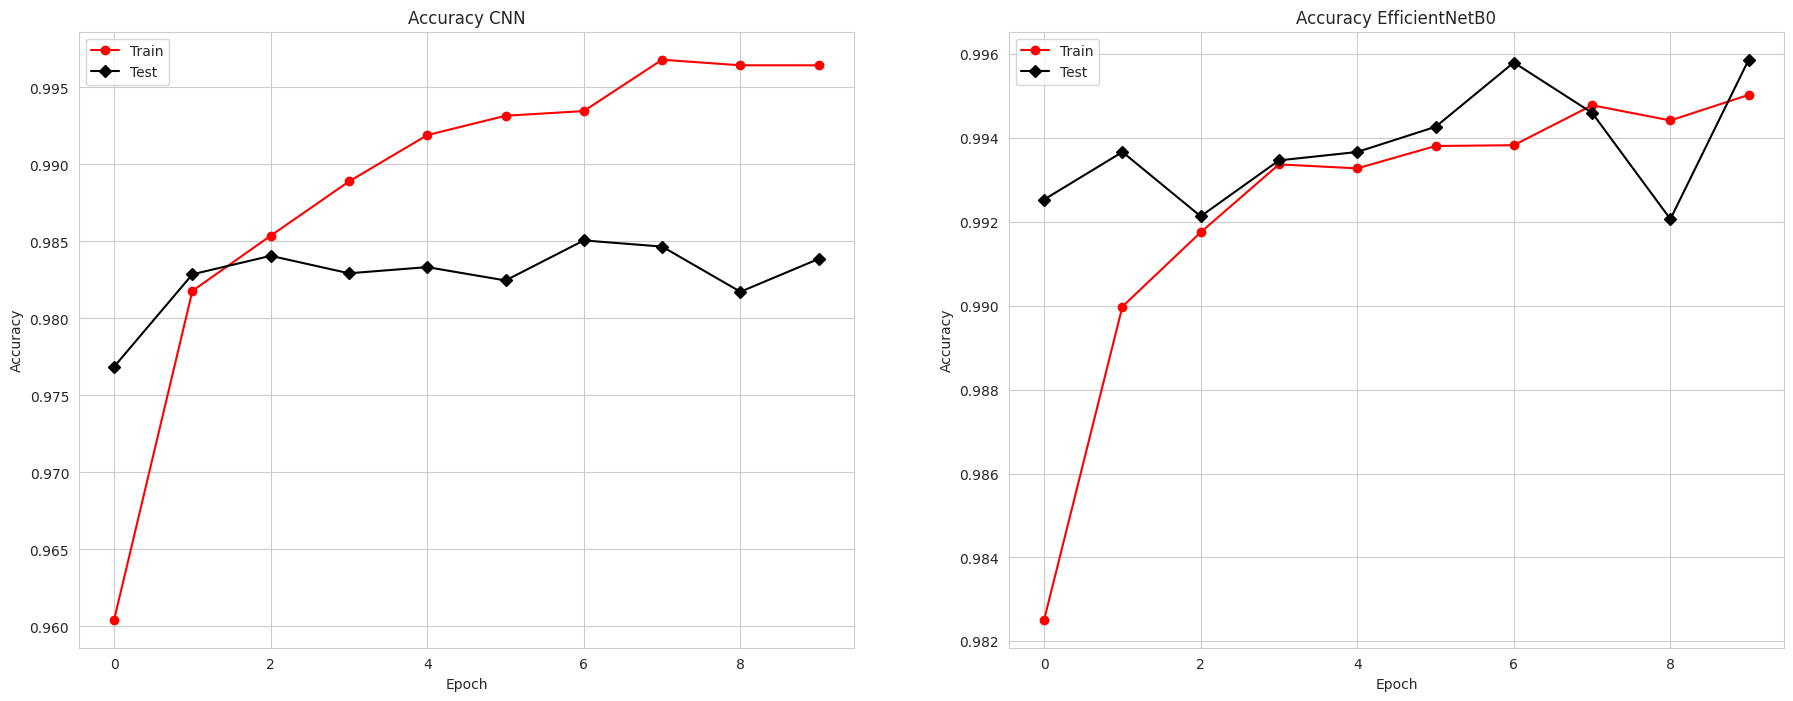

In [ ]:
# Accuracy
plt.figure(figsize=(22,8))
plt.subplot(1,2,1)
plt.plot(History_CNN.history['accuracy'], color='red', marker="o")
plt.plot(History_CNN.history['val_accuracy'],color='black', marker="D")
plt.title('Accuracy CNN')
plt.xlabel("Epoch")
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='best')

plt.subplot(1,2,2)
plt.plot(History_Eff.history['accuracy'], color='red', marker="o")
plt.plot(History_Eff.history['val_accuracy'],color='black', marker="D")
plt.title('Accuracy EfficientNetB0')
plt.xlabel("Epoch")
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='best')

plt.show()

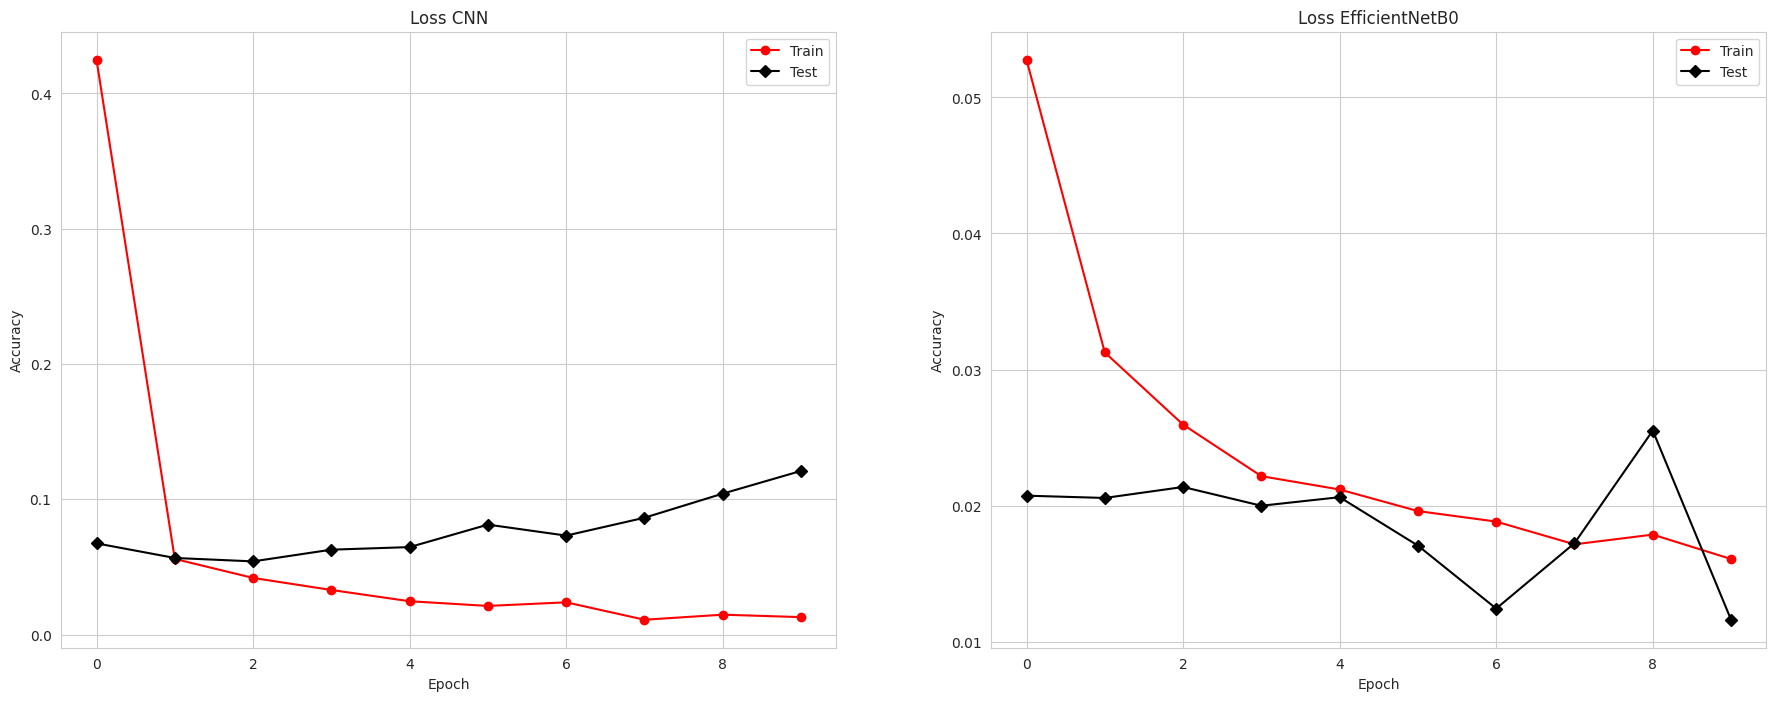

In [ ]:
# Loss
plt.figure(figsize=(22,8))
plt.subplot(1,2,1)
plt.plot(History_CNN.history['loss'], color='red', marker="o")
plt.plot(History_CNN.history['val_loss'],color='black', marker="D")
plt.title('Loss CNN')
plt.xlabel("Epoch")
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='best')

plt.subplot(1,2,2)
plt.plot(History_Eff.history['loss'], color='red', marker="o")
plt.plot(History_Eff.history['val_loss'],color='black', marker="D")
plt.title('Loss EfficientNetB0')
plt.xlabel("Epoch")
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='best')

plt.show()

###Confusion Matrix

In [ ]:
# create a function to draw a confusion matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure(figsize=(7,5))
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, [f"{value}={key}" for key , value in classes.items()], rotation=45)
    plt.yticks(tick_marks, [f"{value}={key}" for key , value in classes.items()])

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i,j]}\n{cm[i,j]/np.sum(cm)*100:.2f}%",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()

In [ ]:
# get ground truth labels and predictions to use in plot_confusion_matrix
def get_true_and_pred_labels(dataset, model):
    y_true = []
    y_pred = []

    for images, labels in dataset:
        labels = labels.numpy()
        outputs = tf.nn.softmax(model(images))
        pred = tf.argmax(outputs, axis=1).numpy()
        images = images.numpy()

        y_true = np.append(y_true, labels)
        y_pred = np.append(y_pred, pred)

    return y_true, y_pred

In [ ]:
# plot confusion matrix for error analysis CNN
y_true_val, y_pred_val = get_true_and_pred_labels(Validation, CNN_Model)

print(classification_report(y_true_val, y_pred_val), '\n\n')

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97      3000
         1.0       0.99      0.98      0.98      3000
         2.0       1.00      1.00      1.00      3000
         3.0       0.98      0.98      0.98      3000
         4.0       0.98      0.98      0.98      3000

    accuracy                           0.98     15000
   macro avg       0.98      0.98      0.98     15000
weighted avg       0.98      0.98      0.98     15000
 




In [ ]:
# plot confusion matrix for error analysis EfficientNetB0
y_true_val_eff, y_pred_val_eff = get_true_and_pred_labels(Validation, model_Eff)

print(classification_report(y_true_val_eff, y_pred_val_eff), '\n\n')

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      3000
         1.0       1.00      0.99      1.00      3000
         2.0       1.00      1.00      1.00      3000
         3.0       0.99      1.00      0.99      3000
         4.0       1.00      1.00      1.00      3000

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000
 




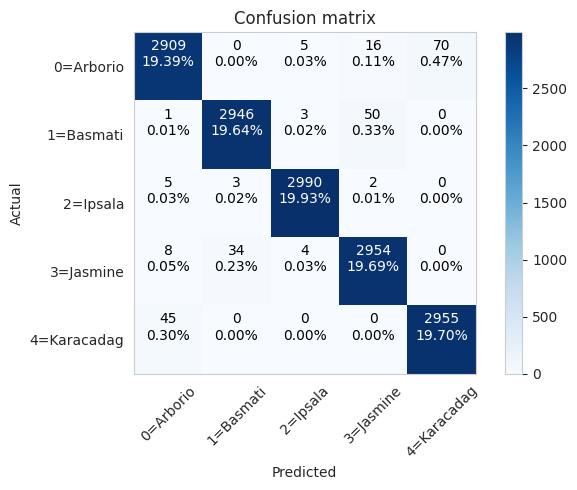

In [ ]:
# Confusion Matrix CNN
cm = confusion_matrix(y_true_val, y_pred_val)
classes = {
    "Arborio":0,
    "Basmati":1,
    "Ipsala":2,
    "Jasmine":3,
    "Karacadag":4,
}
plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

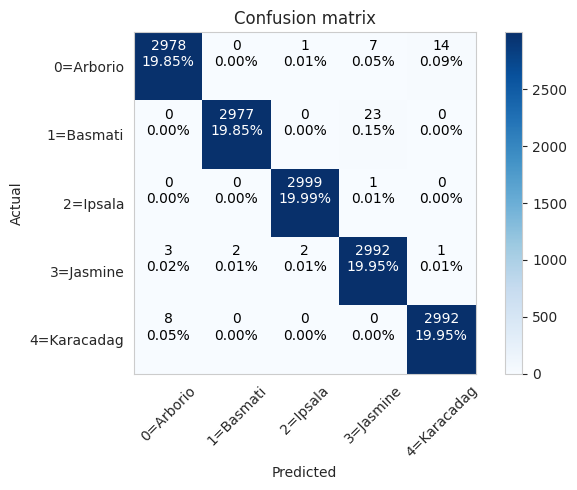

In [ ]:
# Confusion Matrix EfficientNetB0
cm_eff = confusion_matrix(y_true_val_eff, y_pred_val_eff)
classes = {
    "Arborio":0,
    "Basmati":1,
    "Ipsala":2,
    "Jasmine":3,
    "Karacadag":4,
}
plot_confusion_matrix(cm_eff, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

###CNN Prediction

In [ ]:
for images, labels in Test:
    cnn_test_labels = labels
    cnn_predictions = tf.nn.softmax(CNN_Model(images))
    cnn_test_images = images
    break

In [ ]:
# check prediction
print(f"Predicted Logits for First Image: {cnn_predictions[0]}")
print(f"Predicted Label for First Image: {np.argmax(cnn_predictions[0])}")

Predicted Logits for First Image: [0.14417842 0.39191756 0.14417842 0.17554715 0.14417842]
Predicted Label for First Image: 1


###EfficientNetB0 Prediction

In [ ]:
for images, labels in Test:
    eff_test_labels = labels
    eff_predictions = tf.nn.softmax(model_Eff(images))
    eff_test_images = images
    break

In [ ]:
# check prediction
print(f"Predicted Logits for First Image: {eff_predictions[0]}")
print(f"Predicted Label for First Image: {np.argmax(eff_predictions[0])}")

Predicted Logits for First Image: [0.14884782 0.14884762 0.14884762 0.14884762 0.40460923]
Predicted Label for First Image: 4


###Show Predcition Image

In [ ]:
def plot_image(i, predictions_array, true_label, img):

    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.numpy().astype("uint8"))
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'black'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [ ]:
def plot_value_array(i, predictions_array, true_label):

    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(5))
    plt.yticks([])
    thisplot = plt.bar(range(5), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('black')

In [ ]:
def plot_final_result(predictions_array, test_labels, test_images, num_rows=10, num_cols=3):

    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))

    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions_array[i], test_labels, test_images)
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions_array[i], test_labels)

    plt.tight_layout()
    plt.show()

classes = {
    "Arborio":0,
    "Basmati":1,
    "Ipsala":2,
    "Jasmine":3,
    "Karacadag":4,
}

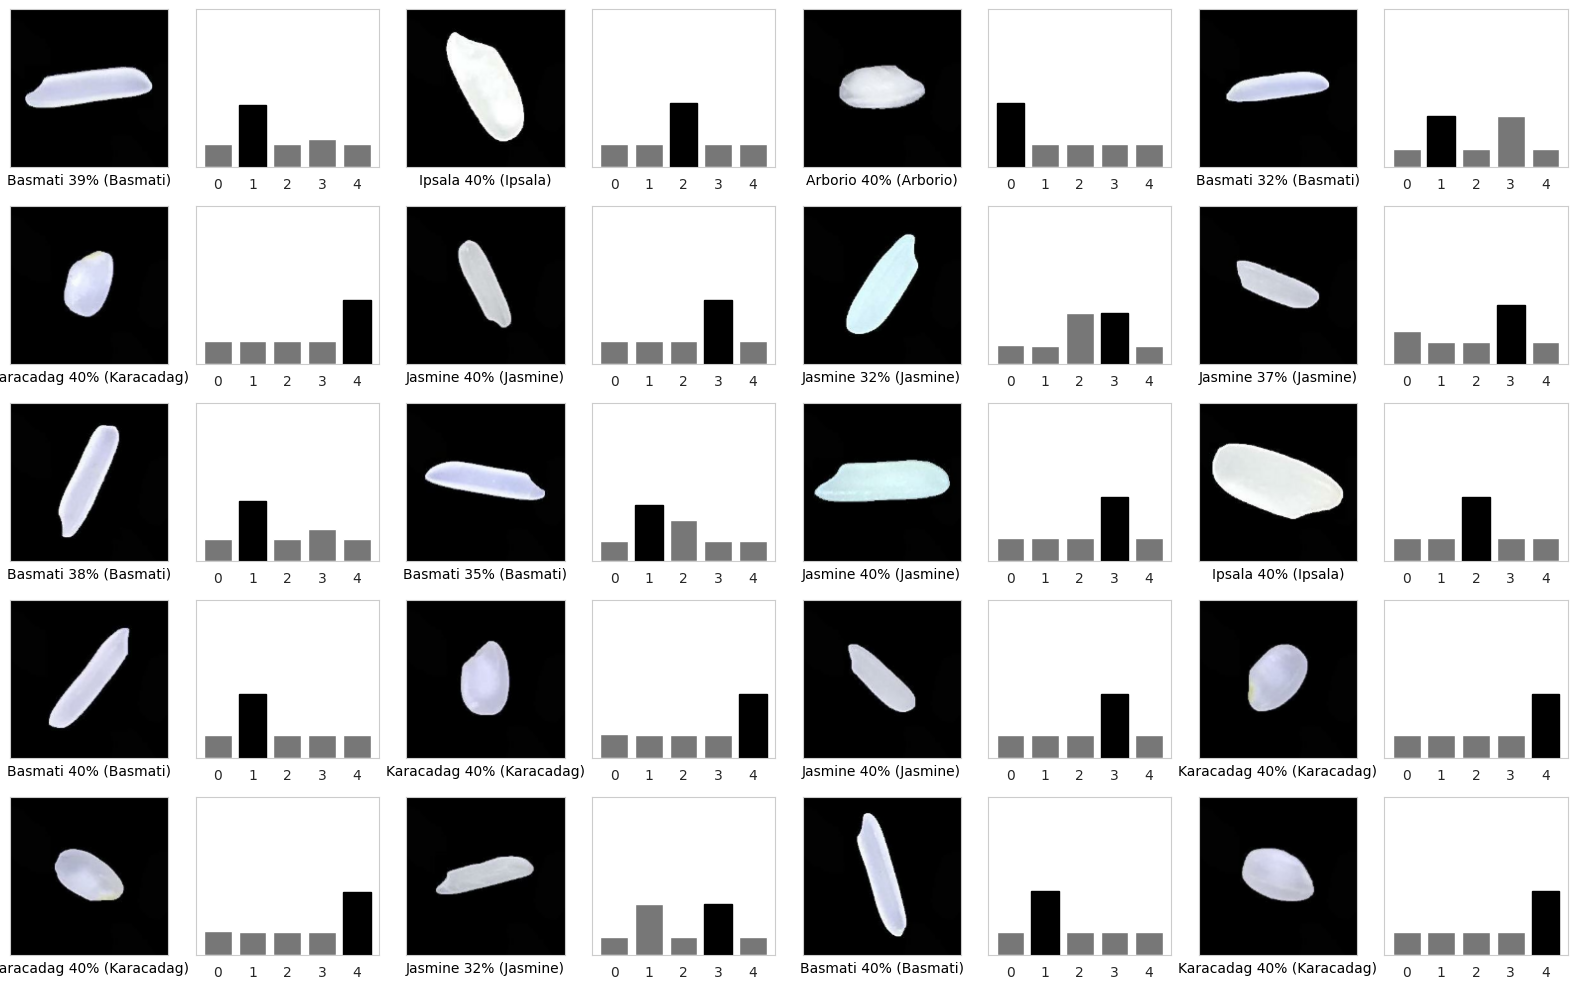

In [ ]:
#CNN Image Prediction
plot_final_result(cnn_predictions, cnn_test_labels, cnn_test_images, num_rows=5, num_cols=4)

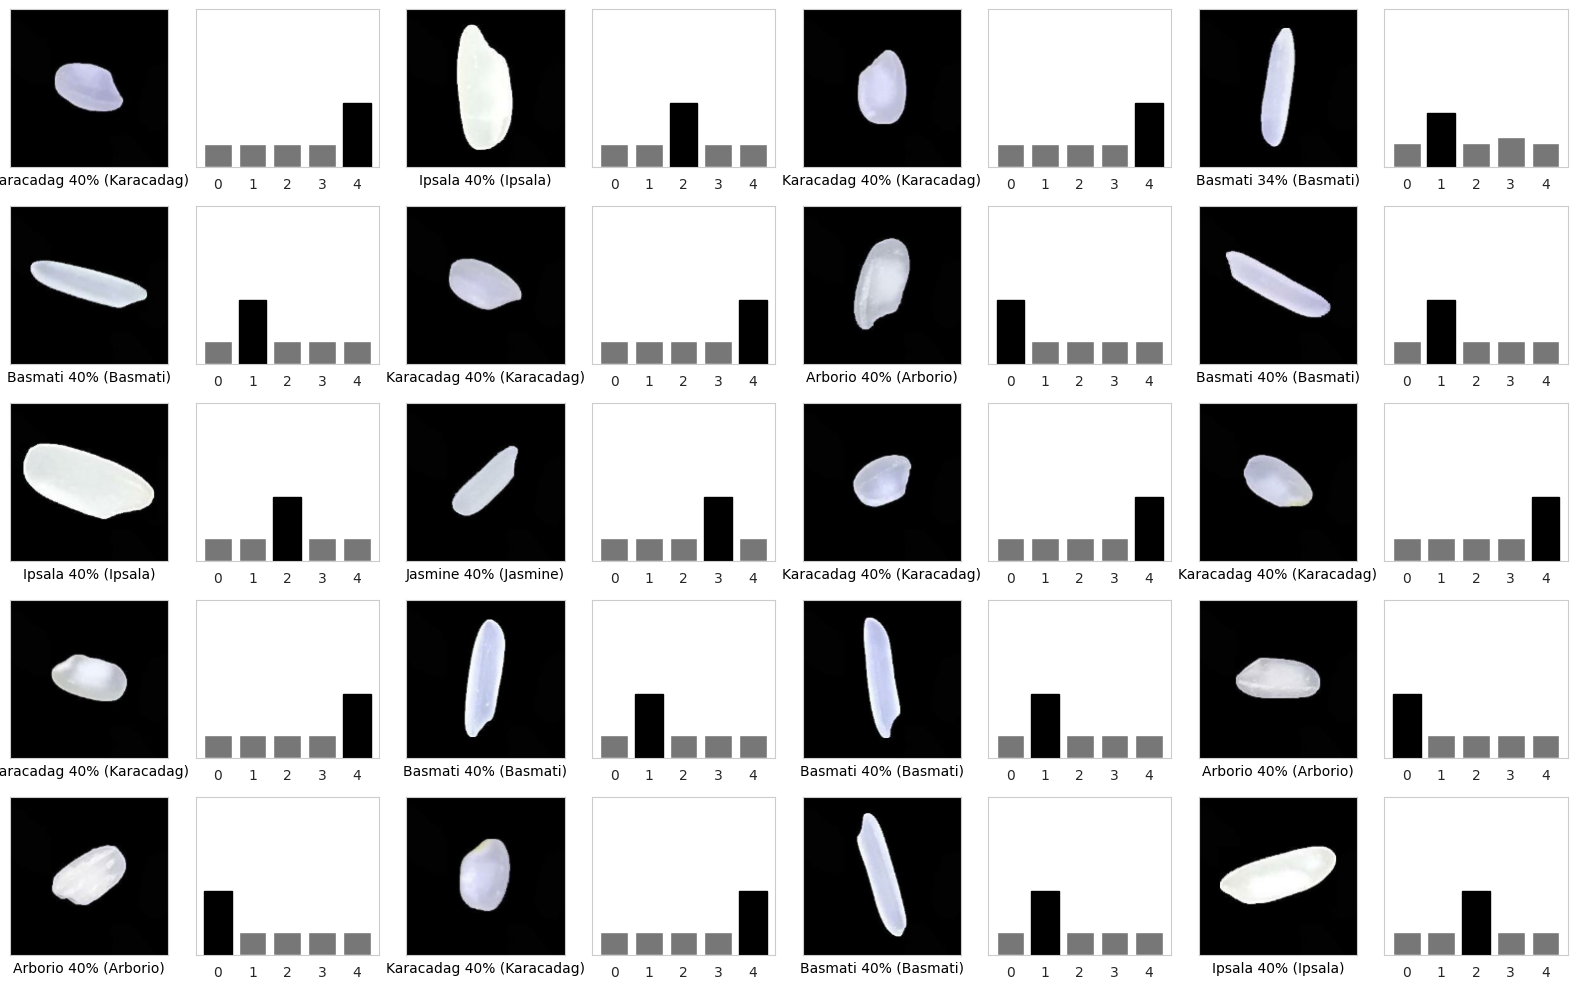

In [ ]:
#EfficientNetB0 Image Prediction
plot_final_result(eff_predictions, eff_test_labels, eff_test_images, num_rows=5, num_cols=4)